In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import geopandas as gpd
from sklearn.linear_model import LinearRegression



In [2]:
df = pd.read_csv('data/shmu/jeseniova,-bratislava-air-quality.csv')
df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
df = df[~(df == '').any(axis=1)]

C:\Users\mar-d\AppData\Local\Temp\ipykernel_10208\657648819.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)


In [3]:
locations = [
    {"name": "mamateyova,-bratislava, slovakia-air-quality.csv", "green0": 0.1020,"green1": 0.1381, "nearest_forest": 2270, "elevation": 139,
     "lat": "48.121245734857", "lon": "17.12946061418353", "road":12000, "citizens20":919, "citizens21":938, "citizens22":1024, "citizens23":1024},
    {"name": "jeseniova,-bratislava-air-quality.csv",  "green0": 0.0740 ,"green1": 0.1586095 , "nearest_forest": 2020, "elevation": 144,
     "lat": "48.168468654943894", "lon": "17.107876657473835", "road":7000, "citizens20":1185, "citizens21":1194, "citizens22":1300, "citizens23":1300},
    {"name": "kamenne-nam., bratislava-air-quality.csv", "green0": 0.0520,"green1":  0.550625 , "nearest_forest": 1060, "elevation": 155,
     "lat": "48.144721272180035", "lon": "17.113225732702183", "road":20000, "citizens20":4326, "citizens21":4402, "citizens22":4823, "citizens23":4823}, 
    {"name": "puchovska,-bratislava-air-quality.csv",  "green0": 0.0262,"green1": 0.0625, "nearest_forest": 1410, "elevation": 156,
     "lat": "48.211323", "lon": "17.157694", "road":25000, "citizens20":919, "citizens21":938, "citizens22":1024, "citizens23":1024}, 
    {"name": "trnavske-myto, bratislava-air-quality.csv",  "green0": 0.0304,"green1": 0.031, "nearest_forest": 2880, "elevation": 147,
     "lat": "48.15957992170497", "lon": "17.127082924157637", "road":45000, "citizens20":919, "citizens21":938, "citizens22":1024, "citizens23":1024}
]

whole_df = pd.DataFrame()

for location in locations:
    df = pd.read_csv(f"data/shmu/{location['name']}")
    df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
    df = df.drop(columns=[' pm25', ' no2', ' so2', ' co'])
    df = df[~(df == '').any(axis=1)]
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    df['lat'] = location['lat']
    df['lon'] = location['lon']
    df['road'] = location['road']
    df['green0'] = location['green0']
    df['green1'] = location['green1']
    df['nearest_forest'] = location['nearest_forest']
    df['elevation'] = location['elevation']
    df['year'] = df['date'].dt.year

    populations = {
        2018: location['citizens20'],
        2019: location['citizens20'],
        2020: location['citizens20'],
        2021: location['citizens21'],
        2022: location['citizens22'],
        2023: location['citizens23']
    }

    # Map the populations to the DataFrame
    df['population'] = df['date'].dt.year.map(populations)
    
    whole_df = pd.concat([whole_df, df])





C:\Users\mar-d\AppData\Local\Temp\ipykernel_10208\3186854732.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
C:\Users\mar-d\AppData\Local\Temp\ipykernel_10208\3186854732.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
C:\Users\mar-d\AppData\Local\Temp\ipykernel_10208\3186854732.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
C:\Users\mar-d\AppData\Local\Temp\ipykernel_10208\3186854732.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
C:\Users\mar-d\AppData\Local\Temp\ipykernel_10208\3186854732.py:18: FutureWarning: DataF

In [30]:
weather = pd.read_csv('data/weather_data.csv')
weather['date'] = pd.to_datetime(weather['datetime'])

result = pd.merge(df, weather, on='date').dropna()
result.head

<bound method NDFrame.head of            date  pm10                lat                 lon   road  green0  \
0    2023-10-01    26  48.15957992170497  17.127082924157637  45000  0.0304   
1    2023-10-02    25  48.15957992170497  17.127082924157637  45000  0.0304   
2    2023-10-03    19  48.15957992170497  17.127082924157637  45000  0.0304   
3    2023-10-04    25  48.15957992170497  17.127082924157637  45000  0.0304   
4    2023-10-05    23  48.15957992170497  17.127082924157637  45000  0.0304   
...         ...   ...                ...                 ...    ...     ...   
1258 2021-12-05    19  48.15957992170497  17.127082924157637  45000  0.0304   
1259 2020-08-01    18  48.15957992170497  17.127082924157637  45000  0.0304   
1260 2020-09-26     5  48.15957992170497  17.127082924157637  45000  0.0304   
1261 2020-03-31    25  48.15957992170497  17.127082924157637  45000  0.0304   
1262 2020-01-01    18  48.15957992170497  17.127082924157637  45000  0.0304   

      green1  nearest

In [146]:
scaler = MinMaxScaler()
#scaler2 = StandardScaler()
scalable_data = result.drop(columns=[' pm10','date', 'sunrise', 'sunset', 'datetime', 'lat', 'lon', 'road', 'green0', 'green1', 'nearest_forest', 'elevation']).astype(float)
data_standardized = scaler.fit_transform(scalable_data)
df_scaled = pd.DataFrame(data_standardized, columns=scalable_data.columns)

# Apply PCA
pca = PCA()
reduced_df = pca.fit_transform(data_standardized)

y = np.log(result[' pm10'].to_numpy().reshape(-1, 1) + 1)


TypeError: can only concatenate str (not "int") to str

In [136]:
pca.explained_variance_ratio_[:10]

array([0.34949497, 0.25679743, 0.16980668, 0.08183022, 0.04909163,
       0.02201654, 0.01593672, 0.0134831 , 0.0097635 , 0.00828448])

In [137]:
model = LinearRegression()
model.fit(reduced_df, y)
predictions = model.predict(reduced_df)

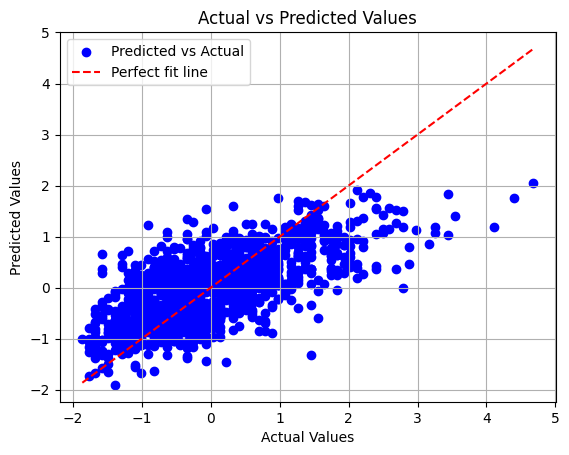

In [138]:

# Plotting actual vs predicted values
plt.scatter(y, predictions, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect fit line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

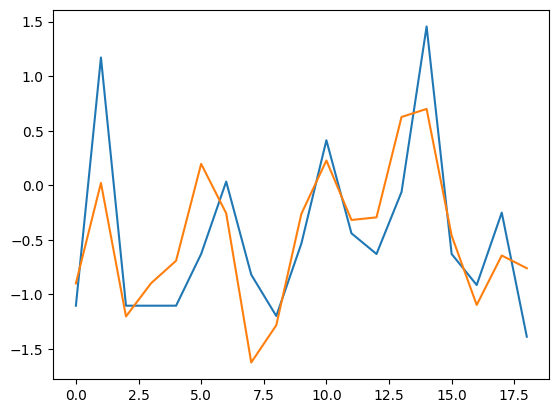

In [160]:
plt.plot(range(19), y[-40:-21])
plt.plot(range(19), predictions[-40:-21])

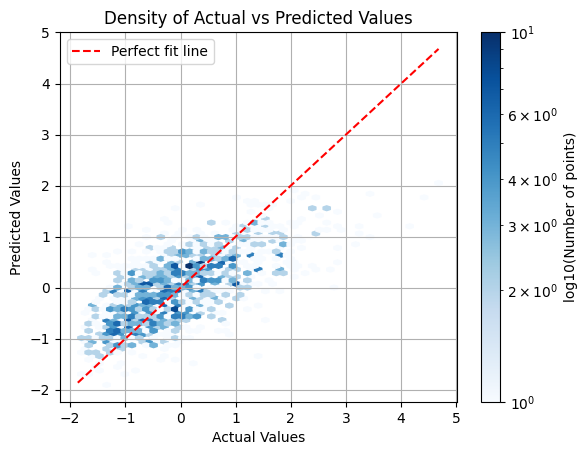

In [139]:
# Hexbin plot for density
plt.hexbin(y, predictions, gridsize=50, cmap='Blues', bins='log', mincnt=1)
cb = plt.colorbar(label='log10(Number of points)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect fit line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Density of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

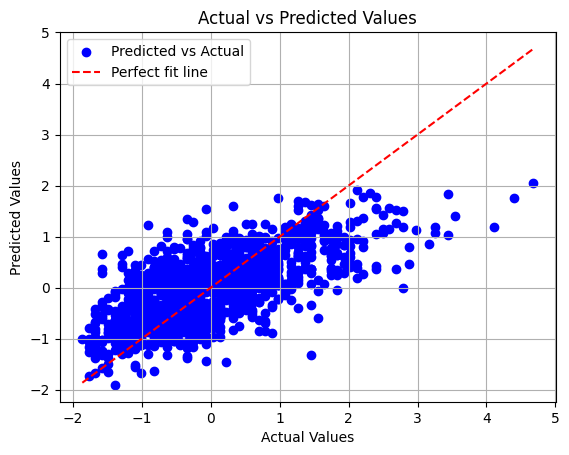

In [140]:
plt.scatter(y, predictions, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect fit line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
df_scaled

,year,population,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,1.000000,1.000000,0.624079,0.613982,0.618497,0.699115,0.557592,0.000201,1.0,0.047657,0.0,0.0,0.114130,0.894795,0.648289,0.485,0.503205,0.387616,0.393617,0.6
1,1.000000,1.000000,0.712531,0.671733,0.699422,0.722714,0.450262,0.000000,0.0,0.000000,0.0,0.0,0.016304,0.315892,0.627376,0.395,0.508013,0.489164,0.496454,0.6
2,1.000000,1.000000,0.732187,0.644377,0.693642,0.793510,0.599476,0.000000,0.0,0.000000,0.0,0.0,0.127717,0.319788,0.543726,0.429,0.435897,0.437461,0.439716,0.6
3,1.000000,1.000000,0.614251,0.674772,0.641618,0.637168,0.405759,0.000000,0.0,0.000000,0.0,0.0,0.426630,0.894239,0.655894,0.589,0.692308,0.186068,0.195035,0.4
4,1.000000,1.000000,0.594595,0.541033,0.580925,0.640118,0.506545,0.000091,1.0,0.047657,0.0,0.0,0.225543,0.814083,0.648289,0.638,0.594551,0.413003,0.418440,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0.333333,0.180952,0.120393,0.252280,0.153179,0.421829,0.997382,0.113535,1.0,0.666629,0.0,0.0,0.092391,0.067910,0.275665,1.000,0.022436,0.005263,0.017730,0.0
1258,0.000000,0.000000,0.808354,0.854103,0.861272,0.690265,0.192408,0.000000,0.0,0.000000,0.0,0.0,0.116848,0.037016,0.437262,0.096,0.592949,0.754799,0.751773,0.9
1259,0.000000,0.000000,0.395577,0.440729,0.404624,0.595870,0.784031,0.301871,1.0,0.380914,0.0,0.0,0.614130,0.765377,0.098859,0.828,0.522436,0.213622,0.223404,0.4
1260,0.000000,0.000000,0.240786,0.206687,0.222543,0.120944,0.215969,0.000000,0.0,0.000000,0.0,0.0,0.116848,0.986919,0.650190,0.342,0.685897,0.580805,0.588652,0.8


In [ ]:
shit_df = pd.read_csv('data/enviro.csv', dtype={49: str})
shit_df = shit_df[shit_df.columns.drop(['PMS5003_0p3umPC','PMS5003_0p5umPC','PMS5003_1p0umPC','PMS5003_2p5umPC','PMS5003_5p0umPC','PMS5003_10p0umPC','rssi','network', 'tags', 'extra', 'metadata', 'created'])]

In [ ]:
shit_df.head(2)

In [ ]:
shit_df[column_name] = pd.to_datetime(df[column_name])

In [144]:
correlations = df_scaled.apply(lambda col: col.corr(y))

print(correlations)

TypeError: unsupported type: <class 'numpy.ndarray'>